# Estimación del beta de una acción


- Mide como es que un activo se mueve en relación al mercado
- Si tengo un portafoliop y le añado un activo, en realidad es más importante saber como se mueve este activo en relación a mi portafolio existente que su volatilidad misma


Pensando en terminos de regresión, ¿puedo utilizar el rendimiento del mercado para predecir un activo individual?

$$r_i = \alpha_i +  \beta_i r_{market}$$

Notese que $\beta$ también puede ser: 

$$\beta_i = \frac{cov(i, market)}{var(market)}$$


<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/en/f/f3/SML-chart.png" width="400px" height="400px" />


# Caso ejemplo Beta: Google y la bolsa de valores

In [4]:
# Bajamos los ETF de yahoo
import yfinance as yf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

#VTI, es el indice que tiene todas las empresas del mercado gringo 


tickers = ['VTI', 'GOOG']
start_date = '2015-01-01'
end_date = "2022-10-01"


St = yf.download(tickers, start=start_date)['Close']
St.head()
rt = St.pct_change().dropna()


[*********************100%%**********************]  2 of 2 completed


<Axes: xlabel='Date'>

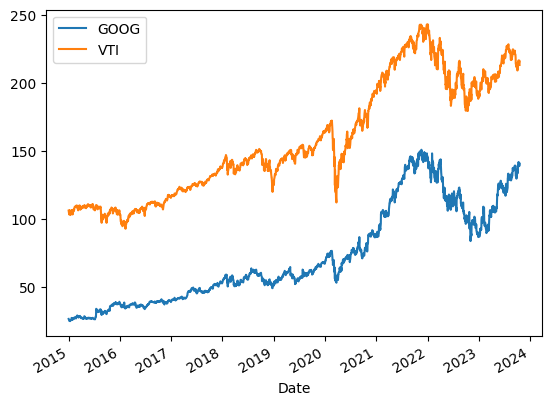

In [5]:
# Grafique google y el mercado de estados unidos
St.plot()

# Normalizar precios

Dividimos los precios entre el precio inicial 

In [12]:
# Crea un data frame que tiene precios normalizados
St['normalized_vti'] = St.VTI / St.VTI.iloc[0]
St['normalized_goog'] = St.GOOG / St.GOOG.iloc[0]

St.head()

,GOOG,VTI,normalized_vti,normalized_goog
Date,,,,
2015-01-02,26.168653,105.919998,1.000000,1.000000
2015-01-05,25.623152,104.099998,0.982817,0.979154
2015-01-06,25.029282,103.080002,0.973187,0.956460
2015-01-07,24.986401,104.309998,0.984800,0.954822
2015-01-08,25.065184,106.150002,1.002171,0.957832


<Axes: xlabel='Date'>

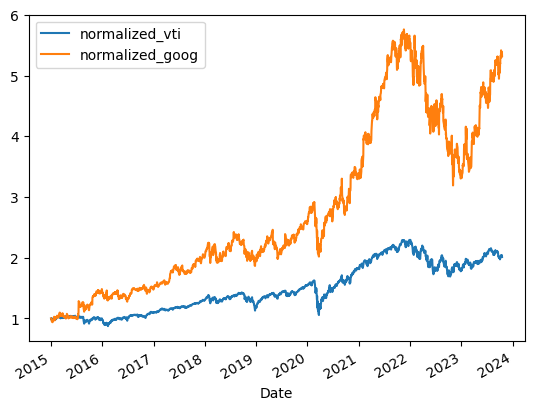

In [13]:
# Visualización de precios normalizados
St[['normalized_vti', 'normalized_goog']].plot()

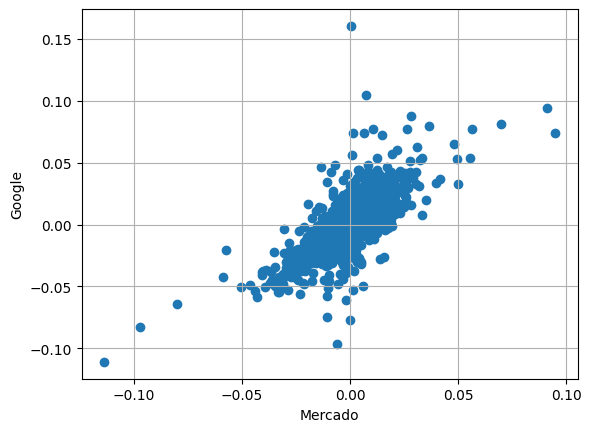

In [14]:
# Gráfico que compara rendimientos 
plt.scatter(rt.VTI, rt.GOOG)
plt.xlabel('Mercado')
plt.ylabel('Google') 
plt.grid()

# Calculemos $\beta$ de google y el mercado 

$$r_i = \alpha_i +  \beta_i r_{market}$$


In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = rt[['VTI']]
y = rt[['GOOG']]

model.fit(X, y)
model.coef_[0][0]

1.1135211890801004

In [18]:
# Calcular beta con regresión
rt.cov()['GOOG']['VTI'] / rt.VTI.var()

1.1135211890800998

$$\beta_i = \frac{Cov(google, market)}{Var(market)} $$

In [19]:
# Calcular beta con covarianza y varianza
market_beta_google = rt.cov()['GOOG']['VTI'] / rt.VTI.var()
market_beta_google

1.1135211890800998

# Calcula el R2 de nuestro modelo

In [21]:
# Prediga y ponga el promedio
from sklearn.metrics import r2_score

# Calcula el R2
predictions = model.predict(X) 

r2_score(y_pred = predictions, y_true = y)

0.5268779423130302

# Vamos a descargar algunos activos del mercado estadounidense y calcular la beta de cada activo

[*********************100%%**********************]  15 of 15 completed


<Axes: xlabel='Date'>

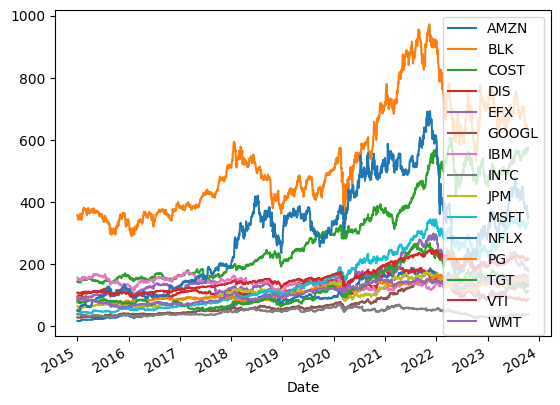

In [29]:
# Descargar precios y graficar
tickers = ['VTI', 'GOOGL', 'EFX', 'COST', 'WMT', 'PG',
     'DIS', 'IBM', 'AMZN', 'TGT', 'JPM', 'INTC',
    'MSFT', 'BLK', 'NFLX']
St = yf.download(tickers, start=start_date)['Close']
St.head()
rt = St.pct_change().dropna()
St.plot()

In [30]:
# Normalizamos todos los activos 
for i in tickers: 
    St['normalized_' + i] = St[[i]] / St[[i]].iloc[0]

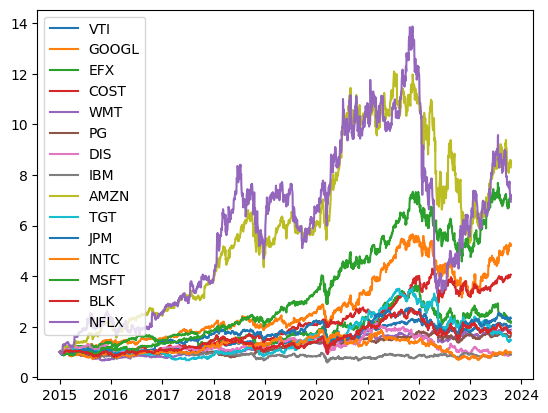

In [34]:
# Veamos la normalización 
for i in tickers:
    plt.plot(St['normalized_' + i], label = i)

plt.legend(loc = 'best')

In [40]:
# Calculemos beta, rendimiento y R2 de cada acción 
betas = {}

for i in tickers: 
    if i != 'VTI':
        #obten el data frame
        flag_df = rt[[i, 'VTI']]
        #Regresion 
        model = LinearRegression()
        X = flag_df[['VTI']]
        y = flag_df[[i]]
        model.fit(X, y) 
        #Beta 
        beta = model.coef_[0][0]
        #r2 
        predicciones = model.predict(X) 
        resultado_r2 = r2_score(y_pred = predicciones, y_true = y) 
        #Juntar todo 
        rendimiento = np.mean(flag_df[i])
        betas[i] = [beta, resultado_r2, rendimiento * 252]

betas




{'GOOGL': [1.1149927659997216, 0.530759706271746, 0.2284259332672947],
 'EFX': [0.9669654270378245, 0.3811217611532779, 0.13008730836037485],
 'COST': [0.693695248800588, 0.34599391590039763, 0.18366923673017413],
 'WMT': [0.4987265097990356, 0.18697519901201531, 0.09493048000933192],
 'PG': [0.5515593466716685, 0.29161168986577213, 0.07566500519659214],
 'DIS': [1.0085543366982659, 0.44553414533741753, 0.02785057494146594],
 'IBM': [0.8316838338490823, 0.4100541071579493, 0.017788439852756136],
 'AMZN': [1.1095384792458847, 0.38301330705246517, 0.2964792040200125],
 'TGT': [0.8014102525470513, 0.2322404497843471, 0.09174573554697187],
 'JPM': [1.1175579360956418, 0.5501718352343907, 0.13575695424723858],
 'INTC': [1.1861035158588253, 0.4397960033722472, 0.05336146563645713],
 'MSFT': [1.1878504432937944, 0.6230122619846069, 0.2617920321350608],
 'BLK': [1.2326948370605983, 0.6634445170606769, 0.10195840434977663],
 'NFLX': [1.163505265113317, 0.23164566741477244, 0.3235521547256726]}

In [41]:
df = pd.DataFrame()
df['acciones'] = [i for i in betas]
df['betas'] = [betas[i][0] for i in betas]
df['r2'] = [betas[i][1] for i in betas]
df['rendimiento'] = [betas[i][2] for i in betas]


/home/dell/.local/lib/python3.10/site-packages/matplotlib/text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/home/dell/.local/lib/python3.10/site-packages/matplotlib/text.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
/home/dell/.local/lib/python3.10/site-packages/matplotlib/text.py:897: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
/home/dell/.local/lib/python3.10/site-packages/matplotlib/text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(

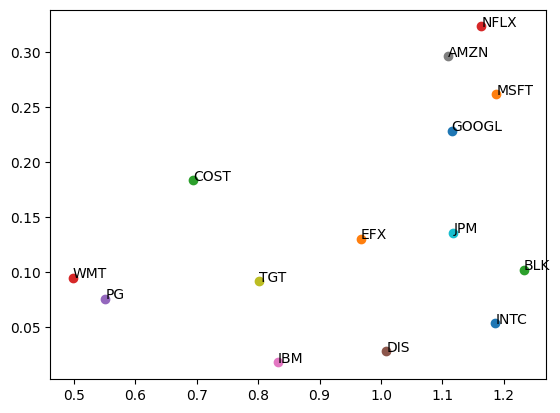

In [42]:
#  Poner todo en un data frame 
for i in df.acciones: 
    flag_df = df[df.acciones == i]
    plt.scatter(flag_df.betas, flag_df.rendimiento)
    plt.text(flag_df.betas, flag_df.rendimiento, i) 
# beta vs rendimientos


Text(0, 0.5, 'r2')

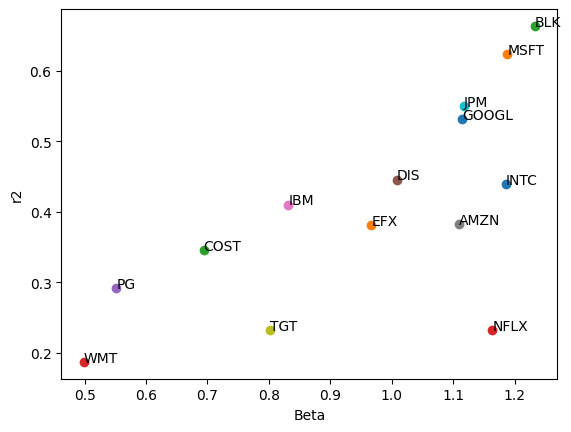

In [44]:
# Grafico, beta vs rendimiento
for i in df.acciones: 
     if i != 'VTI':
        flag_df = df[df.acciones == i]
        plt.scatter(flag_df.betas, flag_df.r2)
        plt.text(flag_df.betas, flag_df.r2, i) 

plt.xlabel('Beta') 
plt.ylabel('r2') 
    

In [ ]:
df[['betas', 'r2']].corr()

In [42]:
# Grafico, beta vs R2 


# Tarea para la siguiente clase